<a href="https://colab.research.google.com/github/benedictlai/thinkful-challenges/blob/master/Confidential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn 
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE 
from scipy.stats import mstats

from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Exploring/Cleaning Data



In [0]:
customers = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/customers_data.csv')
customers=customers.drop(['Unnamed: 0'],axis=1)
customers

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,male,no,31.0,35.0,False
1,65.16,male,yes,23.0,61.0,False
2,40.60,female,no,36.0,49.0,False
3,38.01,male,yes,47.0,57.0,False
4,22.32,female,yes,5.0,39.0,False
...,...,...,...,...,...,...
119995,55.33,female,yes,22.0,41.0,False
119996,55.86,male,yes,22.0,58.0,False
119997,30.16,male,yes,25.0,79.0,False
119998,2.71,female,yes,25.0,60.0,False


In [0]:
object_cols = customers.select_dtypes(['object']).columns.tolist()

for cols in object_cols:
    customers[cols] = customers[cols].astype('category')

# Visualizing Data


# Gender vs. Numerical Data


Text(0.5, 1.0, 'Gender vs. Age')

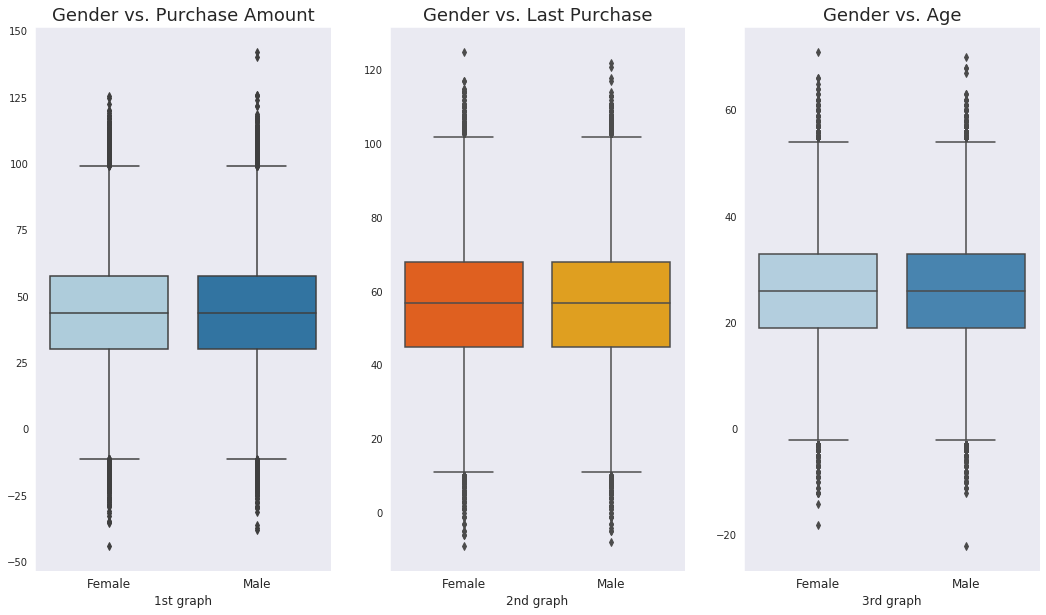

In [0]:
labels = ['Female','Male']

sns.set_style('dark')
f, axes = plt.subplots(1,3, figsize = (18,10))

sns.boxplot(data = customers, x = 'gender', y = 'purch_amt', palette ='Paired', ax = axes[0])
axes[0].set_xlabel('1st graph', fontsize=12)
axes[0].set_xticklabels(labels, fontsize=12)
axes[0].set_ylabel('', fontsize=12)
axes[0].set_title('Gender vs. Purchase Amount', fontsize=18)

sns.boxplot(x = 'gender', y = 'days_since_last_purch', data = customers, palette = 'autumn', ax = axes[1])
axes[1].set_xlabel('2nd graph', fontsize=12)
axes[1].set_xticklabels(labels, fontsize=12)
axes[1].set_ylabel('',fontsize=12)
axes[1].set_title('Gender vs. Last Purchase',fontsize=18)

sns.boxplot(x = 'gender', y = 'age', data = customers, palette ='Blues', ax = axes[2])
axes[2].set_xlabel('3rd graph', fontsize=12)
axes[2].set_xticklabels(labels, fontsize=12)
axes[2].set_ylabel('',fontsize=12)
axes[2].set_title('Gender vs. Age',fontsize=18)

# Loyalty vs. Numerical Data


Text(0.5, 1.0, 'Loyalty vs. Age')

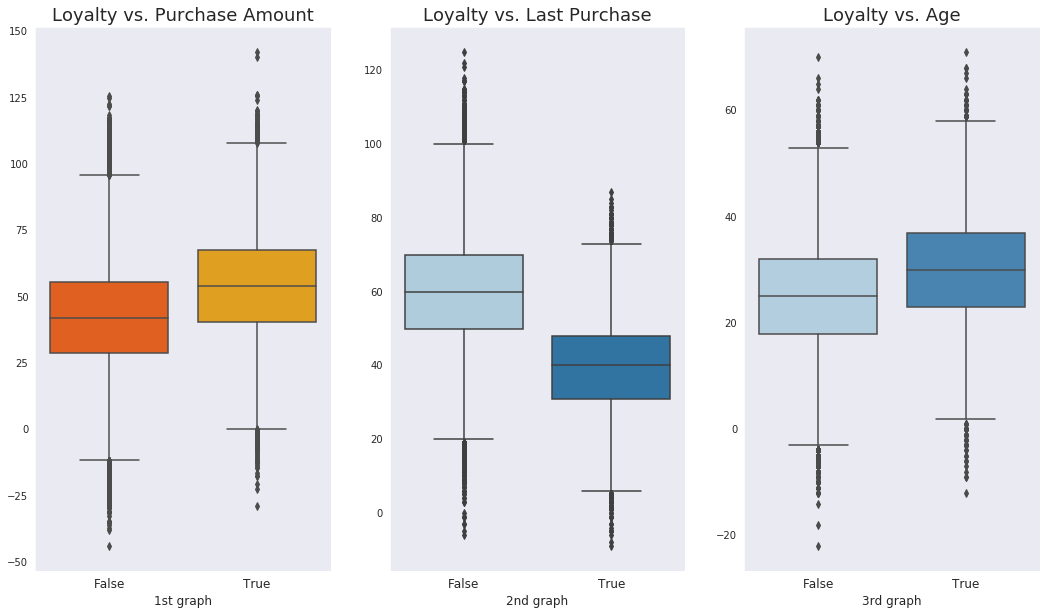

In [0]:
labels = ['False','True']

sns.set_style('dark')
f, axes = plt.subplots(1,3, figsize = (18,10))

sns.boxplot(data = customers, x = 'loyalty', y = 'purch_amt', palette ='autumn', ax = axes[0])
axes[0].set_xlabel('1st graph', fontsize=12)
axes[0].set_xticklabels(labels, fontsize=12)
axes[0].set_ylabel('', fontsize=12)
axes[0].set_title('Loyalty vs. Purchase Amount', fontsize=18)

sns.boxplot(x = 'loyalty', y = 'days_since_last_purch', data = customers, palette = 'Paired', ax = axes[1])
axes[1].set_xlabel('2nd graph', fontsize=12)
axes[1].set_xticklabels(labels, fontsize=12)
axes[1].set_ylabel('',fontsize=12)
axes[1].set_title('Loyalty vs. Last Purchase',fontsize=18)

sns.boxplot(x = 'loyalty', y = 'age', data = customers, palette ='Blues', ax = axes[2])
axes[2].set_xlabel('3rd graph', fontsize=12)
axes[2].set_xticklabels(labels, fontsize=12)
axes[2].set_ylabel('',fontsize=12)
axes[2].set_title('Loyalty vs. Age',fontsize=18)


# Engineering Features


# Data Encoding



In [0]:
customersencode = customers.copy()
lb = LabelEncoder()

customersencode['gender'] = lb.fit_transform(customers['gender'])
customersencode['card_on_file'] = lb.fit_transform(customers['card_on_file'])
customersencode['loyalty'] = lb.fit_transform(customers['loyalty'])

customersencode.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,1,0,31.0,35.0,0
1,65.16,1,1,23.0,61.0,0
2,40.60,0,0,36.0,49.0,0
3,38.01,1,1,47.0,57.0,0
4,22.32,0,1,5.0,39.0,0


# Model Improvements


In [0]:
labenc = preprocessing.LabelEncoder()
labenc.fit(customers['loyalty'])
t = labenc.transform(customers['loyalty'])
customers['loyalty_int'] = t
customers.groupby('loyalty_int').size()
#0=False #1=True

loyalty_int
0    100000
1     20000
dtype: int64

In [0]:
print(round(customersencode['loyalty'].value_counts()[0]/len(customersencode) * 100,2), '% of the loyalty dataset comes from false statements.')
print(round(customersencode['loyalty'].value_counts()[1]/len(customersencode) * 100,2), '% of the loyalty dataset comes from true statements.')

83.33 % of the loyalty dataset comes from false statements.
16.67 % of the loyalty dataset comes from true statements.


# Fixing the Oversampling Data



In [0]:
x = customersencode.drop('loyalty', axis=1)
y = customers['loyalty']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(x, y)

balancedcustomers = pd.DataFrame(X_res)
balancedcustomers['Class'] = y_res

pd.DataFrame(y_res)[0].value_counts()

True     100000
False    100000
Name: 0, dtype: int64

# Split Train and Test Data


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Types of Models


# Logistic Regression

In [0]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('The Logistic Regression score is', round(lr.score(X_test, y_test) * 100,2),'%')

y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The Logistic Regression score is 79.71 %


array([[15683,  4217],
       [ 3900, 16200]])

# Testing Other Models


In [0]:
dtc = DecisionTreeClassifier()
gb = GradientBoostingClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
rig = RidgeClassifier()

dtc.fit(X_train, y_train)
gb.fit(X_train, y_train)
knn.fit(X_train, y_train)
rig.fit(X_train, y_train)
rf.fit(X_train, y_train)

print('Decision Tree\'s score is:', round(dtc.score(X_test, y_test) * 100,2),'%.')
print('Gradient Boosting\'s score is:', round(gb.score(X_test, y_test) * 100,2),'%.')
print('KNeighbors\' score is:', round(knn.score(X_test, y_test) * 100,2),'%.')
print('Random Forest\'s score is:', round(rf.score(X_test, y_test) * 100,2),'%.')
print('Ridge\'s score is:', round(rig.score(X_test,y_test) *100,2),'%.')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Decision Tree's score is: 87.67 %.
Gradient Boosting's score is: 86.96 %.
KNeighbors' score is: 85.9 %.
Random Forest's score is: 90.32 %.
Ridge's score is: 79.74 %.


# Voting Classifer Model


In [0]:
vc = VotingClassifier(estimators=[('dtc',dtc),('gb', gb),('rf', rf)], voting='hard')
vc.fit(X_train, y_train)
print('The voting classifer percentage is: ', round(vc.score(X_test,y_test) *100,2),'%')

The voting classifer percentage is:  90.27 %


# Evaluating Models


In [0]:
y_pred_rf = rf.predict(X_test)
y_pred_vc = vc.predict(X_test)
print ('Classification Report for Random Forest Classifer Model\n', classification_report(y_test, y_pred_rf))
print ('\nClassification Report for Voting Classifer Model\n', classification_report(y_test, y_pred_vc))

Classification Report for Random Forest Classifer Model
               precision    recall  f1-score   support

       False       0.89      0.92      0.90     19900
        True       0.92      0.88      0.90     20100

    accuracy                           0.90     40000
   macro avg       0.90      0.90      0.90     40000
weighted avg       0.90      0.90      0.90     40000


Classification Report for Voting Classifer Model
               precision    recall  f1-score   support

       False       0.90      0.91      0.90     19900
        True       0.91      0.89      0.90     20100

    accuracy                           0.90     40000
   macro avg       0.90      0.90      0.90     40000
weighted avg       0.90      0.90      0.90     40000



# Cross Validation Models


In [0]:
print('The Random Forest\'s cross-validation scores are:\n', cross_val_score(rf, X_test, y_test, cv=5))
print('The Voting Classifier\'s cross-validation scores are:\n', cross_val_score(vc, X_test, y_test, cv=5))

The Random Forest's cross-validation scores are:
 [0.868625 0.872125 0.876    0.871125 0.870875]
The Voting Classifier's cross-validation scores are:
 [0.877   0.87125 0.87975 0.87475 0.877  ]


# Improve Model Performance: Random Forest



In [0]:
rf = RandomForestClassifier(max_features='sqrt', min_samples_leaf=1, max_depth=30, n_estimators=54)

rf.fit(X_train, y_train)

print('The Random Forest\'s score:', round(rf.score(X_test, y_test) * 100,2),'%')

The Random Forest's score: 90.8 %


In [0]:
print('The Random Forest\'s cross-validation scores are:\n', cross_val_score(rf, X_test, y_test, cv=5))

The Random Forest's cross-validation scores are:
 [0.8775   0.872625 0.880375 0.8745   0.879125]
